<center>
<img src="https://i.ibb.co/b3T5hkz/logo.png" alt="logo" border="0" width=600>


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
celsius = np.array([-40., -30., -10., -5., 0., 8., 15., 22., 38., 50.])
fahrenheit = np.array([-40. , -22. ,  14. ,  23. ,  32. ,  46.4,  59. ,  71.6, 100.4,
       122. ])


df = pd.DataFrame(celsius, columns=['C'] )
df['F'] = fahrenheit
df

,C,F
0,-40.0,-40.0
1,-30.0,-22.0
2,-10.0,14.0
3,-5.0,23.0
4,0.0,32.0
5,8.0,46.4
6,15.0,59.0
7,22.0,71.6
8,38.0,100.4
9,50.0,122.0


In [ ]:
#capa1 = tf.keras.layers.Dense(units=1, input_shape=[1])
#model = tf.keras.Sequential([capa1, capa2, capa3,  ])

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1)))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss = 'mean_squared_error'
)

In [ ]:
history = model.fit(celsius, fahrenheit, epochs=1000, verbose= False)

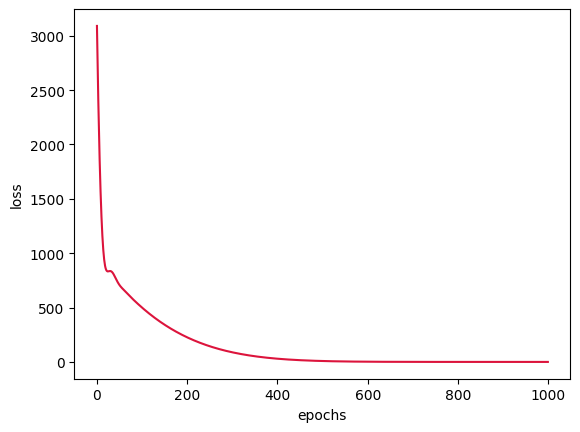

In [ ]:
plt.figure()
plt.plot(history.history['loss'], color='crimson')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
model.predict([100.0])

1/1 [==============================] - 0s 109ms/step


array([[211.9896]], dtype=float32)

In [ ]:
predictions = model.predict(celsius)
predictions

1/1 [==============================] - 0s 107ms/step


array([[-40.039246],
       [-22.037184],
       [ 13.966936],
       [ 22.967966],
       [ 31.968996],
       [ 46.370644],
       [ 58.972084],
       [ 71.573524],
       [100.37682 ],
       [121.979294]], dtype=float32)

In [ ]:
df = pd.DataFrame(celsius, columns=['C'] )
df['F'] = fahrenheit
df['Predictions']= predictions
df

,C,F,Predictions
0,-40.0,-40.0,-40.039246
1,-30.0,-22.0,-22.037184
2,-10.0,14.0,13.966936
3,-5.0,23.0,22.967966
4,0.0,32.0,31.968996
5,8.0,46.4,46.370644
6,15.0,59.0,58.972084
7,22.0,71.6,71.573524
8,38.0,100.4,100.376823
9,50.0,122.0,121.979294


In [ ]:
capa1 = model.get_layer(index=0)

capa1.get_weights()

[array([[1.800206]], dtype=float32), array([31.968996], dtype=float32)]

---

These values correspond to the slope, $\frac{9}{5} = 1.8$, and the intercept, $32$, of the well known transformation equation,

\begin{equation}
ºF = \frac{9}{5} ºC + 32
\end{equation}





---

In [ ]:
hl1 = tf.keras.layers.Dense(units=3, input_shape=[1])
hl2 = tf.keras.layers.Dense(units=3)
outl = tf.keras.layers.Dense(units=1)

model2 = tf.keras.Sequential([hl1, hl2, outl])

In [ ]:
model2.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss = 'mean_squared_error'
)

In [ ]:
history2 = model2.fit(celsius, fahrenheit, epochs = 500, verbose=False)


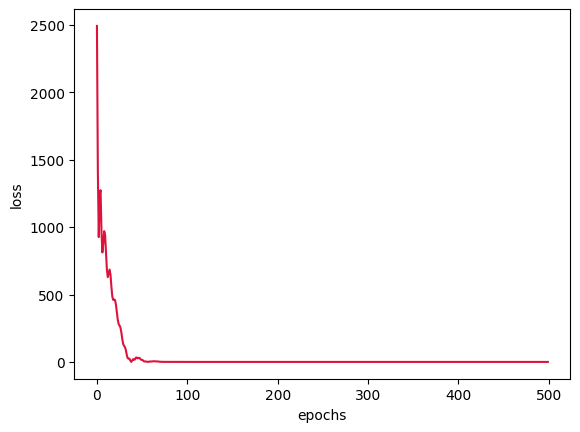

In [ ]:
plt.figure()
plt.plot(history2.history['loss'], color='crimson')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
predictions = model2.predict(celsius)
predictions

1/1 [==============================] - 0s 117ms/step


array([[-40.000004],
       [-22.      ],
       [ 14.000002],
       [ 23.      ],
       [ 32.      ],
       [ 46.399998],
       [ 59.      ],
       [ 71.600006],
       [100.40001 ],
       [121.99999 ]], dtype=float32)

In [ ]:
df = pd.DataFrame(celsius, columns=['C'] )
df['F'] = fahrenheit
df['Predictions']= predictions
df

,C,F,Predictions
0,-40.0,-40.0,-40.000004
1,-30.0,-22.0,-22.000000
2,-10.0,14.0,14.000002
3,-5.0,23.0,23.000000
4,0.0,32.0,32.000000
5,8.0,46.4,46.399998
6,15.0,59.0,59.000000
7,22.0,71.6,71.600006
8,38.0,100.4,100.400009
9,50.0,122.0,121.999992


In [ ]:
history.history['loss'][-1]

0.0009527858346700668

In [ ]:
history2.history['loss'][-1]

2.0736478506533373e-11

In [ ]:
print(hl1.get_weights())
print(hl2.get_weights())
print(outl.get_weights())

[array([[-0.22554739,  0.4193117 ,  0.6861152 ]], dtype=float32), array([2.340601 , 3.7072706, 3.729508 ], dtype=float32)]
[array([[ 0.03065671, -0.09047543,  0.95325327],
       [ 0.12937297,  0.8802048 ,  1.1347973 ],
       [ 0.3970652 ,  0.84616137,  0.49923626]], dtype=float32), array([2.3894215, 3.7552145, 3.623497 ], dtype=float32)]
[array([[0.4397761 ],
       [0.68248206],
       [1.6529542 ]], dtype=float32), array([3.5471773], dtype=float32)]
